In [9]:
import pandas as pd
import os
import numpy as np

from settings import TIME_RESULTS_PATH, TIME_LIMIT, DATASET_TABLE_PATH, PAPER_RESULTS_FOLDER

In [10]:
dataset_table = pd.read_csv(DATASET_TABLE_PATH)
dataset_table = dataset_table.reindex(dataset_table.index.append(dataset_table.index[dataset_table["dataset"]=="nutrimouse"])).sort_index().reset_index(drop=True)
dataset_table.loc[dataset_table["dataset"] == "nutrimouse", "dataset"] = ["nutrimouse_genotype", "nutrimouse_diet"]
dataset_table = dataset_table.set_index("dataset")
print("dataset_table", dataset_table.shape)
dataset_table

dataset_table (17, 3)


,n_samples,n_features,n_cells
dataset,,,
simulated_gm,100,"[2, 2]",400
nutrimouse_genotype,40,"[120, 21]",5640
nutrimouse_diet,40,"[120, 21]",5640
buaa,90,"[100, 100]",18000
sensIT300,300,"[50, 50]",30000
statlog,2310,"[9, 10]",43890
simulated_InterSIM,500,"[367, 131, 160]",329000
wisconsin,265,"[265, 1703]",521520
bbcsport,116,"[1991, 2063, 2113, 2158]",965700


In [11]:
results = pd.read_csv(TIME_RESULTS_PATH)
print("results", results.shape)
print("Total time:", round(results["time"].sum() / 60 / 60, 1))
results.head()

results (510, 6)
Total time: 45.9


,algorithm,dataset,time,finished,completed,comments
0,Concat,simulated_gm,0.128960,True,True,{}
1,Concat,nutrimouse_genotype,0.017040,True,True,{}
2,Concat,nutrimouse_diet,0.011321,True,True,{}
3,Concat,buaa,0.391231,True,True,{}
4,Concat,sensIT300,0.635927,True,True,{}


In [12]:
results.to_csv(os.path.join(PAPER_RESULTS_FOLDER, "time_matrix.csv"), index= False)
mat = results.copy()
mat['time'] = mat['time'].fillna(mat.groupby('dataset')['time'].transform('max'))
mat.to_csv(os.path.join(PAPER_RESULTS_FOLDER, "im_time_matrix.csv"), index= False)

In [13]:
pivot_table = results.pivot(columns="dataset", index= "algorithm", values="time")

In [14]:
for algorithm in results["algorithm"].unique():
    results.loc[results["algorithm"] == algorithm, "time"] = results.loc[results["algorithm"] == algorithm, "time"].values / dataset_table["n_cells"].reset_index(drop=True).values
    
results.groupby("algorithm", sort= False)["time"].mean().sort_values().to_csv(os.path.join(PAPER_RESULTS_FOLDER, "time_barplot.csv"))
results['time'] = results['time'].fillna(results.groupby('dataset')['time'].transform('max'))
results.groupby("algorithm", sort= False)["time"].mean().sort_values().to_csv(os.path.join(PAPER_RESULTS_FOLDER, "im_time_barplot.csv"))

In [7]:
time_table = pivot_table * 10 * 4 * 1.5 * 50 / 60 / 24 / 6 / 3
time_table[time_table < 0] = 0
print("Total", time_table.sum().sum())
print()
print(time_table.sum())
print()
print(time_table.sum(1))

Total 17965.183893947342

dataset
bbcsport                310.655432
bdgp                    908.105239
buaa                      9.050575
caltech101             8377.978953
digits                 1609.492629
metabric               2222.823205
nuswide                 626.047147
nutrimouse_diet           2.140347
nutrimouse_genotype       2.091522
sensIT300                13.774015
simulated_InterSIM      170.773506
simulated_gm              5.656662
simulated_netMUG        249.519050
statlog                1594.837396
tcga                   1569.946215
webkb                   260.238463
wisconsin                32.053538
dtype: float64

algorithm
AJIVE         14.323624
COCA        8420.375949
Concat         8.639267
DAIMC         54.990591
DFMF           5.422828
DeepMF       669.990758
EEIMVC         3.927069
GPCA           2.563146
IMSCAGL     3500.805331
IMSR          83.376189
IntNMF       499.471040
LFIMVC         2.421800
MKKMIK         5.522511
MOFA          66.274766
MONET    

In [95]:
time_table = pivot_table.drop(index= ["SUMO", "MONET", "IntNMF", "MSNE"])
time_table[time_table > 1800] = 0
time_table[time_table < 0] = 0
time_table = time_table * 10 * 4 * 1.5 * 50 / 60 / 24 / 6 / 3
print("Total", time_table.sum().sum())
print()
print(time_table.sum())
print()
print(time_table.sum(1))

Total 1283.4633693370652

dataset
bbcsport                12.116904
bdgp                    93.829872
buaa                     1.504916
caltech101             114.612904
digits                  95.286768
metabric               238.043167
nuswide                200.752370
nutrimouse_diet          0.979360
nutrimouse_genotype      0.952663
sensIT300                1.958548
simulated_InterSIM       6.946794
simulated_gm             1.056076
simulated_netMUG       100.068214
statlog                 58.929812
tcga                   229.314028
webkb                  107.468395
wisconsin               19.642581
dtype: float64

algorithm
AJIVE        14.077581
COCA        169.880242
Concat        8.639267
DAIMC        53.877989
DFMF          5.422828
DeepMF      384.220791
EEIMVC        2.269637
GPCA          2.563146
IMSR         83.376189
LFIMVC        2.421800
MKKMIK        3.929165
MOFA         66.274766
MVCRSC       13.352998
MVSC         38.609054
NEMO         40.523856
NMF           3.9

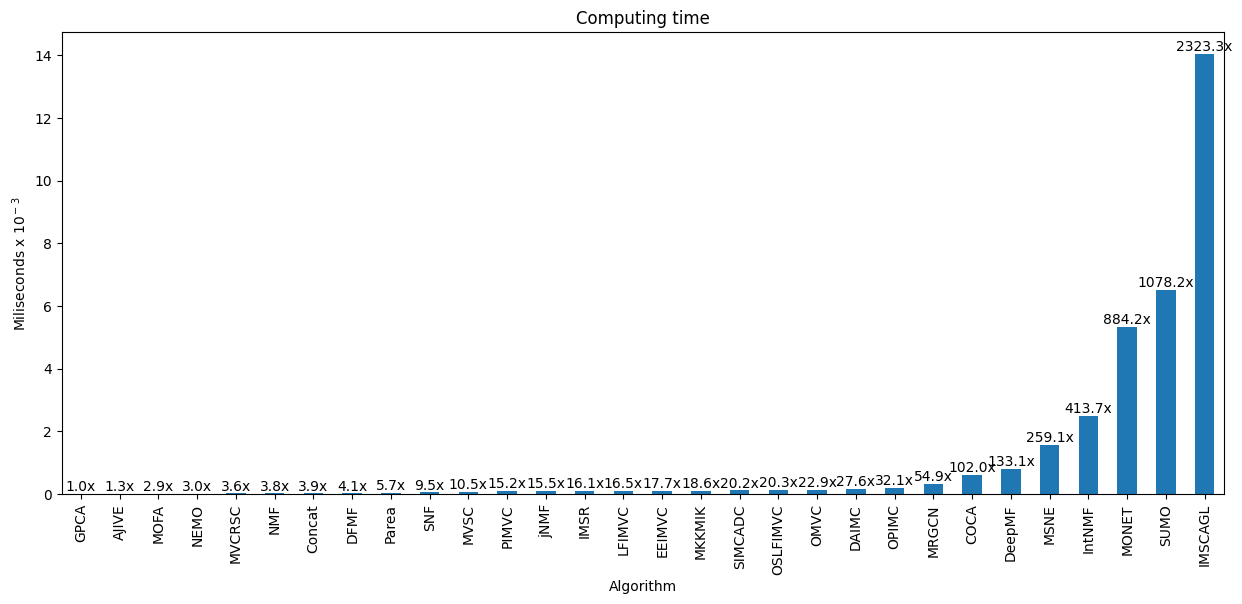

In [15]:
time = (pivot_table/dataset_table["n_cells"]).mean(1)
time = time.sort_values()
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
ax = time.mul(1000).plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Miliseconds x 10$^-$$^3$", figsize= (15,6))
_ = ax.bar_label(ax.containers[0], labels= labels)

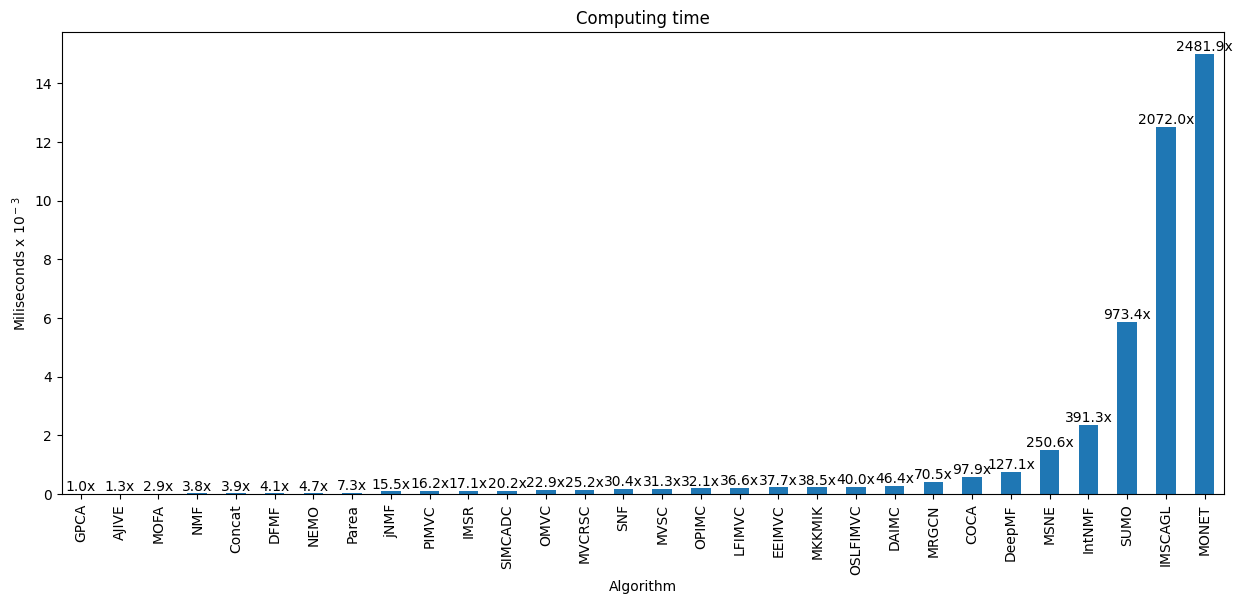

In [16]:
time = (pivot_table.fillna(pivot_table.max())/dataset_table["n_cells"]).mean(1)
time = time.sort_values()
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
ax = time.mul(1000).plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Miliseconds x 10$^-$$^3$", figsize= (15,6))
_ = ax.bar_label(ax.containers[0], labels= labels)

In [26]:
time_table.div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

dataset,bbcsport,bdgp,buaa,caltech101,digits,metabric,nuswide,nutrimouse_diet,nutrimouse_genotype,sensIT300,simulated_InterSIM,simulated_gm,simulated_netMUG,statlog,tcga,webkb,wisconsin
algorithm,,,,,,,,,,,,,,,,,
AJIVE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
COCA,0,0,0,138,1,0,0,0,0,0,0,0,0,0,1,0,0
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DAIMC,0,0,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0
DFMF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DeepMF,5,1,0,0,0,1,nan,0,0,0,0,0,1,0,1,1,0
EEIMVC,0,0,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0
GPCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IMSCAGL,0,4,0,0,24,7,0,0,0,0,0,0,0,15,6,1,0


In [27]:
time_table.fillna(time_table.max()).div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

dataset,bbcsport,bdgp,buaa,caltech101,digits,metabric,nuswide,nutrimouse_diet,nutrimouse_genotype,sensIT300,simulated_InterSIM,simulated_gm,simulated_netMUG,statlog,tcga,webkb,wisconsin
algorithm,,,,,,,,,,,,,,,,,
AJIVE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
COCA,0,0,0,138,1,0,0,0,0,0,0,0,0,0,1,0,0
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DAIMC,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0
DFMF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DeepMF,5,1,0,0,0,1,7,0,0,0,0,0,1,0,1,1,0
EEIMVC,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0
GPCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IMSCAGL,0,4,0,0,24,7,0,0,0,0,0,0,0,15,6,1,0


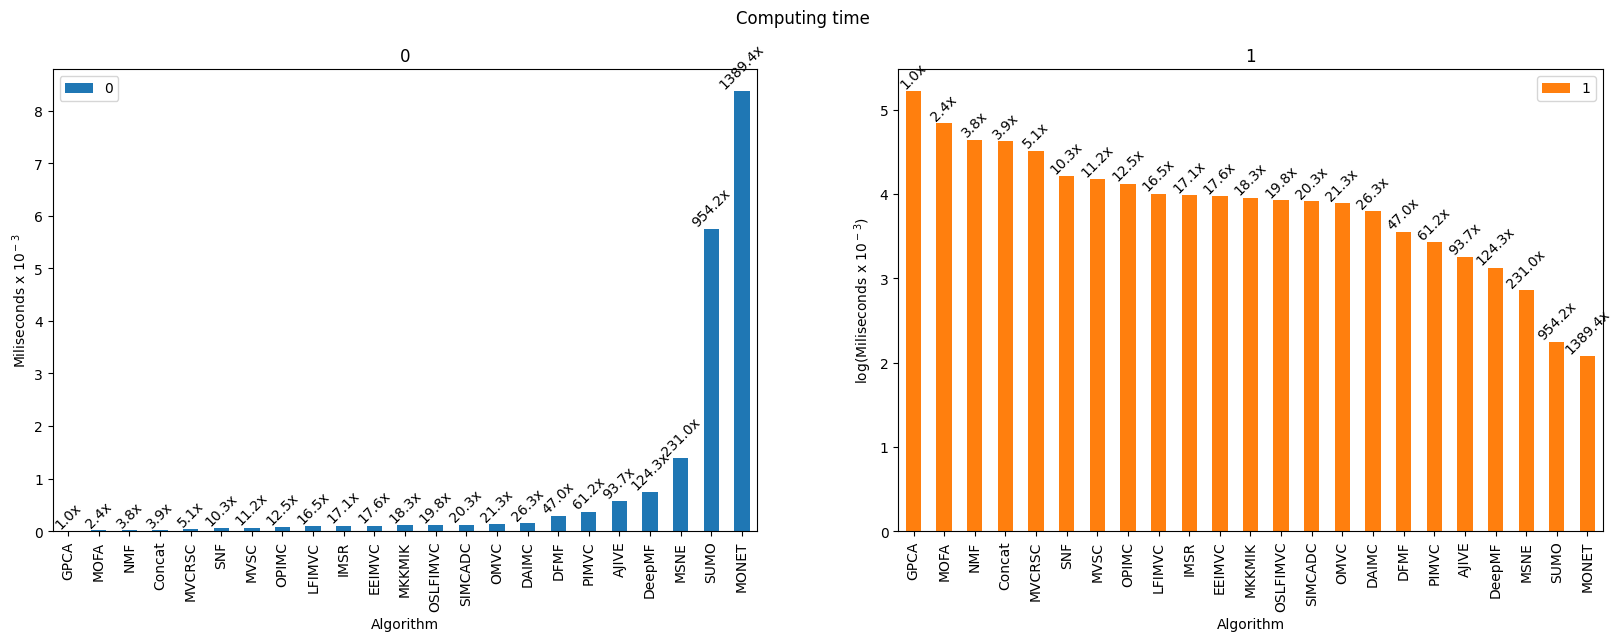

In [23]:
time = (results.fillna(results.max())/dataset_table["n_cells"]).mean(1)
time = time.sort_values()
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time.mul(1000), 0- time.apply(np.log10)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Miliseconds x 10$^-$$^3$", subplots= True, layout= (1,2), figsize= (20,6))
for idx, ax in enumerate(axs.flatten()):
    if idx > 0:
        ax.set(ylabel= f"log({ax.get_ylabel()})")
    _ = ax.bar_label(ax.containers[0], labels= labels, rotation= 45)

In [21]:
results.loc[["AJIVE", "DeepMF", "DFMF"], "simulated_gm"] = results["simulated_gm"].mean()
results.loc[["AJIVE", "PIMVC"], "statlog"] = results["statlog"].mean()
results.loc[["SUMO"], "simulated_InterSIM"] = results["simulated_InterSIM"].mean()
results.loc[["SUMO"], "bbcsport"] = results["bbcsport"].mean()
results.loc[["SUMO", "PIMVC"], "digits"] = results["digits"].mean()

In [22]:
results.fillna(results.max()).div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

,simulated_gm,nutrimouse_genotype,nutrimouse_diet,buaa,sensIT300,statlog,simulated_InterSIM,wisconsin,bbcsport,digits,simulated_netMUG,bdgp,webkb,metabric,tcga,nuswide,caltech101
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0
NMF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0
MVSC,0,0,0,0,0,0,0,0,0,2,0,1,0,0,2,61,-0
MVCRSC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,61,-0
GPCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0
AJIVE,0,0,0,0,0,3,0,0,0,0,0,0,0,1,1,61,-0
SNF,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,61,-0
DAIMC,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2,61,-0
EEIMVC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,-0
IMSR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,-0


In [6]:
results.div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

,simulated_gm,nutrimouse_genotype,nutrimouse_diet,buaa,sensIT300,statlog,simulated_InterSIM,wisconsin,bbcsport,digits,simulated_netMUG,bdgp,webkb,metabric,tcga,nuswide,caltech101
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0
NMF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0
MVSC,0,0,0,0,0,0,0,0,0,2,0,1,0,0,2,nan,-0
MVCRSC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,nan,-0
GPCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0
AJIVE,nan,0,0,0,0,nan,0,0,0,0,0,0,0,1,1,nan,-0
SNF,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,nan,-0
DAIMC,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2,nan,-0
EEIMVC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,-0
IMSR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,-0


In [13]:
results[results > 180] = 0

In [14]:
(results * 10 * 4 * 1.5 * 50 / 60 / 60 / 24 / 5).sum().sum()

20.90107539754778

In [40]:
((results.drop(["MSNE", "SUMO", "MONET"]) * 10 * 5 * 1.5 * 50).sum() / 3600 / 24 / 3).sum()

78.9197823236245

In [18]:
TIME_RESULTS_PATH = os.path.join("test", "time_evaluation.csv")
results = pd.read_csv(TIME_RESULTS_PATH, index_col=0)
print("results", results.shape)
results.head()

results (21, 17)


,simulated_gm,simulated_InterSIM,simulated_netMUG,nutrimouse_genotype,nutrimouse_diet,bbcsport,buaa,metabric,digits,bdgp,tcga,caltech101,nuswide,sensIT300,statlog,webkb,wisconsin
Concat,0.020937,0.708584,0.958623,0.009495,0.011490,0.615496,0.305074,2.049203,1.042008,1.386216,1.822453,26.032111,10.992597,NaN,NaN,NaN,NaN
NMFC,0.007160,0.100091,0.469670,0.011918,0.010763,0.384972,0.089377,1.584606,0.505531,0.581798,3.354856,55.975224,18.057429,NaN,NaN,NaN,NaN
MVSpectralClustering,0.202724,5.404086,8.444749,0.196069,0.129316,0.464554,0.231217,20.060005,59.064082,25.078926,65.652452,5110.285582,NaN,NaN,NaN,NaN,NaN
MVCoRegSpectralClustering,0.110259,0.561998,3.278590,0.103106,0.136843,0.464830,0.145448,11.874035,13.414390,13.489572,33.783051,2289.544764,NaN,NaN,NaN,NaN,NaN
GroupPCA,0.009973,0.162918,0.335689,0.107292,0.105674,0.364418,0.106394,1.336521,1.034737,1.087339,1.359900,5.737082,3.183031,NaN,NaN,NaN,NaN


Iteration 6.64 days
Limited iteration 0.1 days
Total time        33198.950103
Estimated time      502.557883
dtype: float64


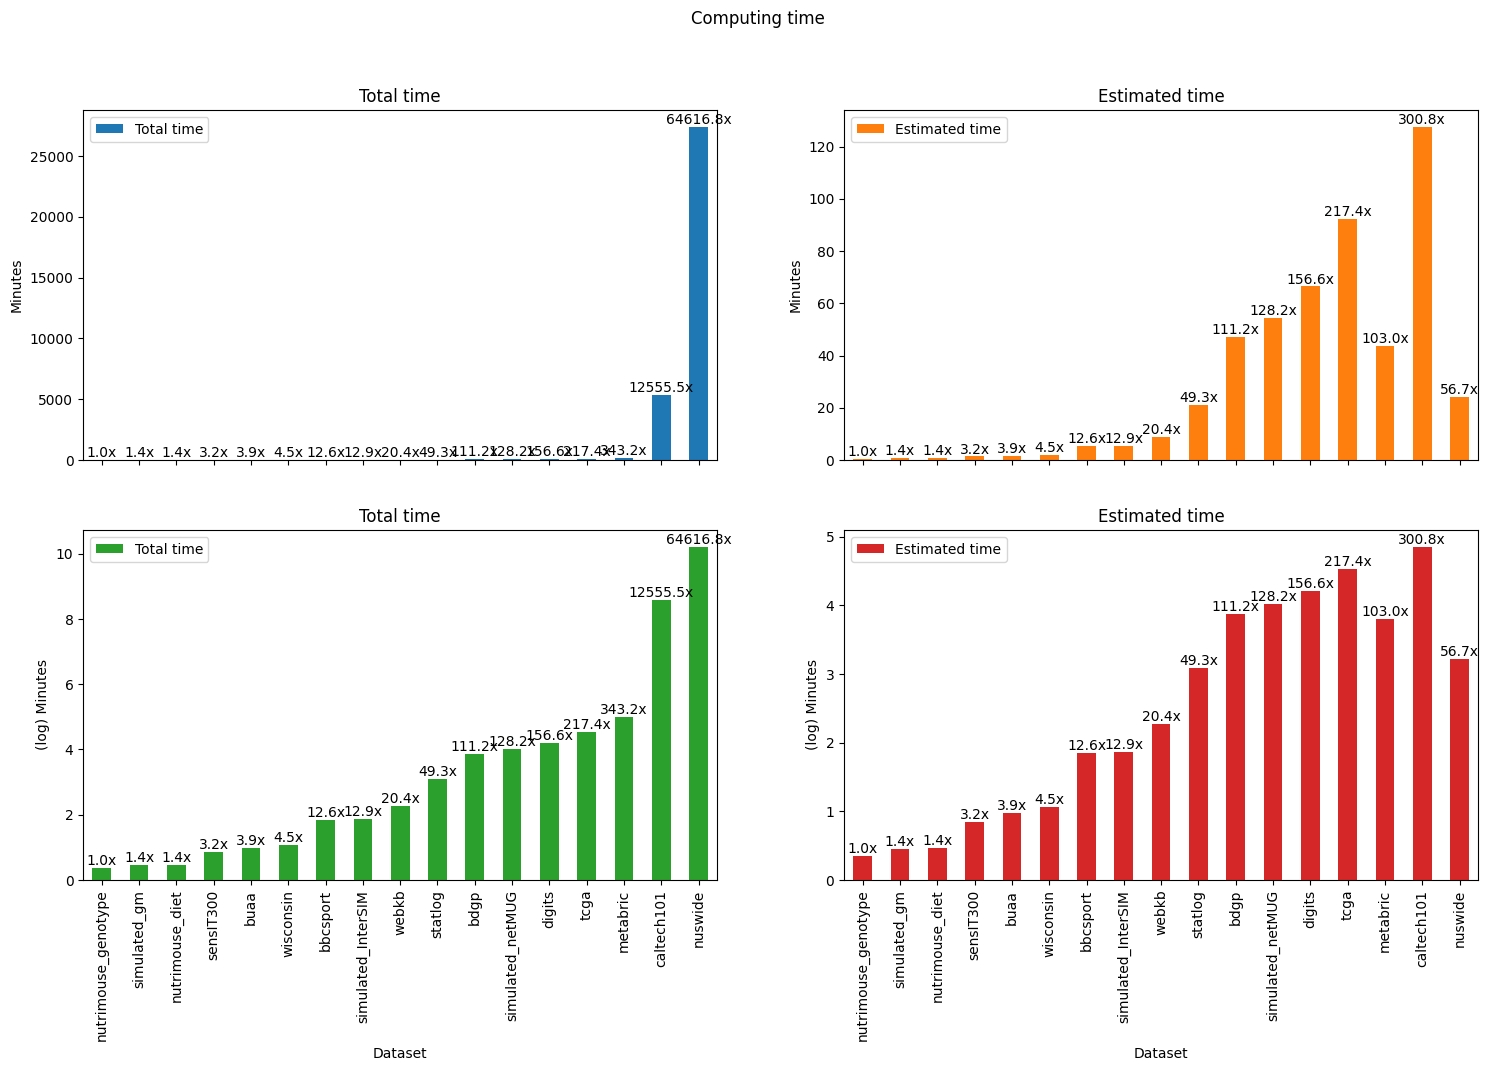

In [5]:
TIME_LIMIT = 0.4
time_limit_seconds = TIME_LIMIT * 3600

N_MISSING_PERCENTAGE = 10
N_MISSING_PATTERNS = 5
N_IMPUTING_PATTERNS = 2
N_PERMUTATIONS = 50

estimated_time = results[results < time_limit_seconds]

print("Iteration", round(results.div(3600).div(24).sum().sum(), 2), "days")
print("Limited iteration", round(estimated_time.div(3600).div(24).sum().sum(), 2), "days")
time = pd.DataFrame([(results * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum(),
                     (estimated_time * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum()],
                    index= ["Total time", "Estimated time"]).T
time = time.div(3600).div(24).sort_values("Total time")
print(time.sum(0))
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Dataset", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

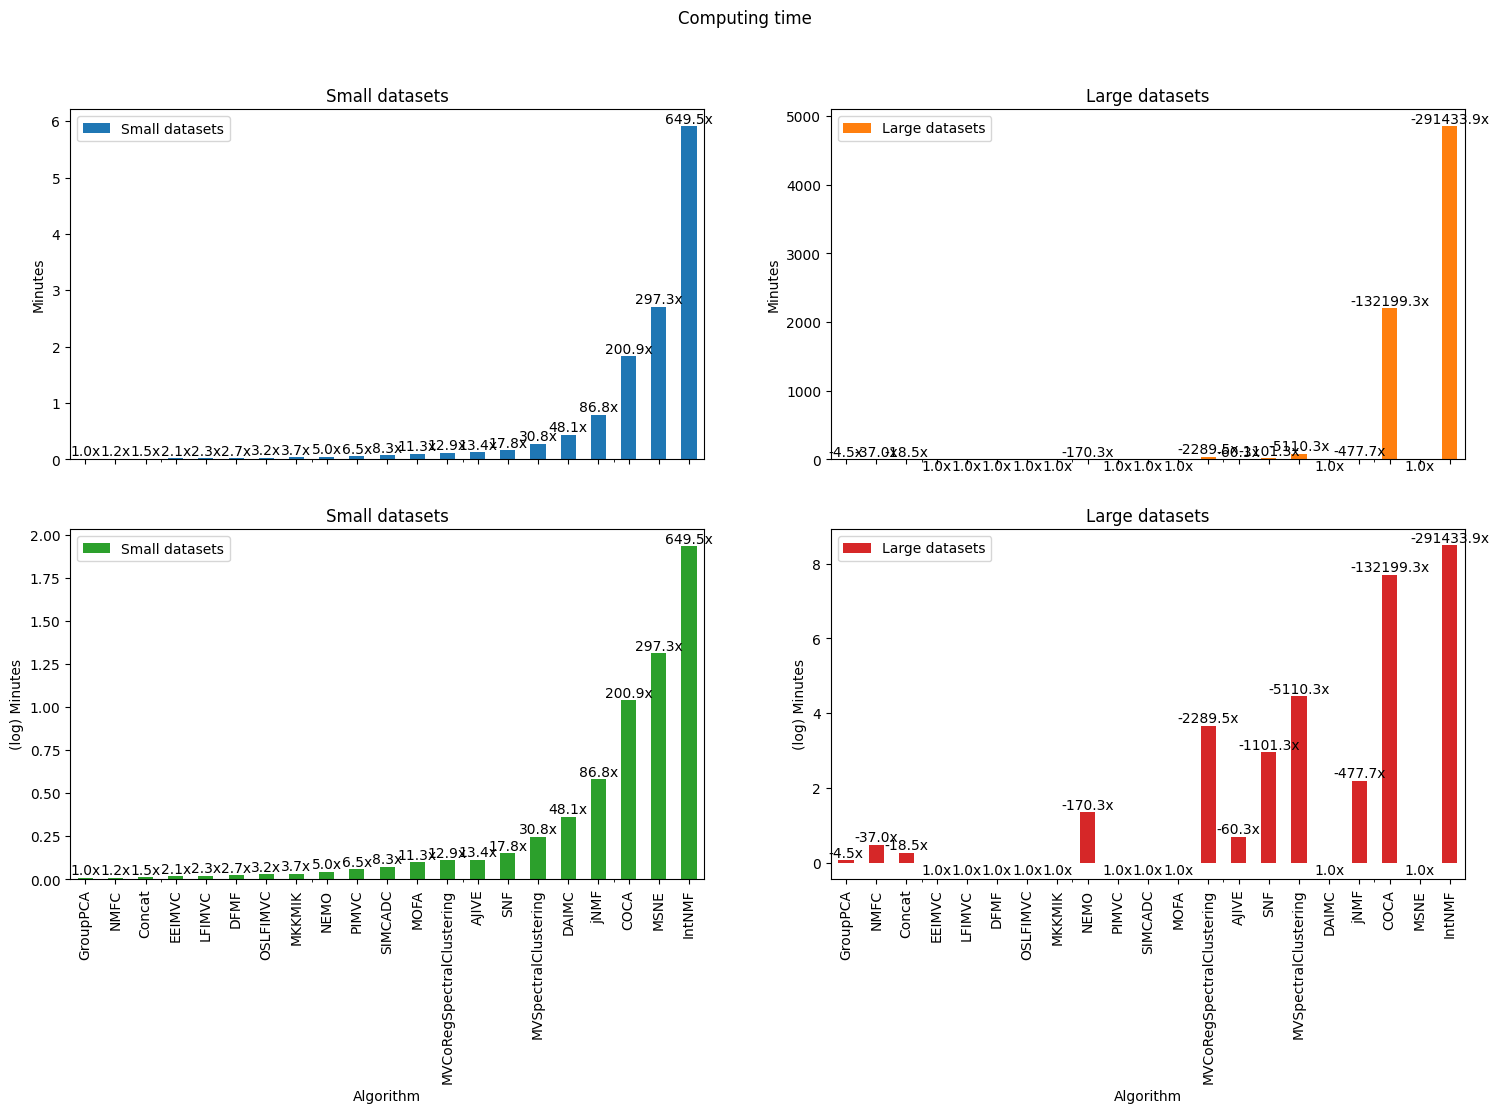

In [6]:
large_datasets = ["caltech101", "nuswide"]
time = pd.DataFrame([results.drop(columns=large_datasets).mean(1), results[large_datasets].mean(1)], index= ["Small datasets", "Large datasets"]).T
time = time.div(60).sort_values("Small datasets")
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

In [6]:
results.div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

,simulated_gm,simulated_InterSIM,simulated_netMUG,nutrimouse_genotype,nutrimouse_diet,bbcsport,buaa,metabric,digits,bdgp,tcga,caltech101,nuswide,sensIT300,statlog,wisconsin,webkb
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0,-0,-0
NMFC,0,0,0,0,0,0,0,0,0,0,0,1,0,-0,-0,-0,-0
MVSpectralClustering,0,0,0,0,0,0,0,0,1,0,1,85,nan,-0,-0,-0,-0
MVCoRegSpectralClustering,0,0,0,0,0,0,0,0,0,0,1,38,nan,-0,-0,-0,-0
GroupPCA,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0,-0,-0
AJIVE,nan,0,0,0,0,0,0,0,0,0,0,1,1,-0,-0,-0,-0
SNF,0,0,0,0,0,0,0,0,0,0,1,18,nan,-0,-0,-0,-0
IntNMF,0,0,11,0,0,nan,0,29,nan,nan,nan,nan,4857,-0,-0,-0,-0
COCA,0,0,0,0,0,0,0,3,6,4,7,1374,3032,-0,-0,-0,-0
jNMF,0,0,1,0,0,0,0,2,0,1,3,10,5,-0,-0,-0,-0
